## Random Agent Reward Distribution

In [41]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [42]:
data_path = '../baselines/session_0ccadddd/'

In [59]:
all_rollouts = []
for json_path in Path(data_path).glob("*.json"):
    with open(json_path, 'r') as f:
        data = json.load(f)
        data = data[0]
        data['id'] = json_path.name
        #print(data)
        all_rollouts.append(data)
print(all_rollouts)

[{'event': 0, 'level': 0, 'heal': 0, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 85.2, 'id': 'all_runs_338b6c5d.json'}, {'event': 0, 'level': 16, 'heal': 0.4084084084084072, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 71.39999999999999, 'id': 'all_runs_601f6152.json'}, {'event': 0, 'level': 0, 'heal': 0, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 38.699999999999996, 'id': 'all_runs_69069463.json'}, {'event': 0, 'level': 0, 'heal': 0, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 99.0, 'id': 'all_runs_75713793.json'}, {'event': 0, 'level': 0, 'heal': 0, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 84.66, 'id': 'all_runs_79e12599.json'}, {'event': 0, 'level': 0, 'heal': 0, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 72.17999999999999, 'id': 'all_runs_7b5516a0.json'}, {'event': 0, 'level': 0, 'heal': 0, 'op_lvl': 0.0, 'dead': -0.0, 'badge': 0, 'explore': 86.88, 'id': 'all_runs_8e52fcb6.json'}, {'event': 4, 'level': 0, 'heal': 0, 'op_lvl': 0.0,

In [62]:
rewards = [roll['rewards'][-1] for roll in all_rollouts]

KeyError: 'rewards'

In [61]:
all_rollouts[rewards.index(max(rewards))]['id']

ValueError: max() arg is an empty sequence

Text(0, 0.5, 'Frequency')

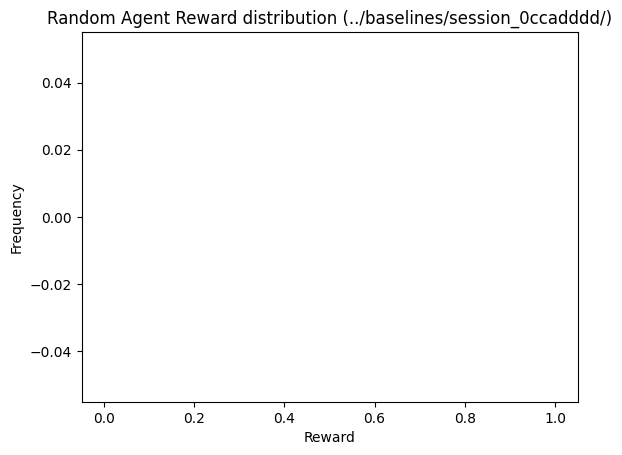

In [47]:
plt.hist(rewards, bins=30, color=(0.7,0.2,0.2))
plt.title(f'Random Agent Reward distribution ({data_path})')
plt.xlabel('Reward')
plt.ylabel('Frequency')

## Random Agent Attempted Movements

In [48]:
from pyboy import WindowEvent
from notebook_video_writer import VideoWriter

ImportError: cannot import name 'WindowEvent' from 'pyboy' (C:\Users\dolson\Documents\GitHub\CSCE642PokemonRedDDPG\.venv\Lib\site-packages\pyboy\__init__.cp311-win_amd64.pyd)

In [61]:
button_to_dir = {
    WindowEvent.PRESS_ARROW_LEFT: np.array([-1,0]),
    WindowEvent.PRESS_ARROW_RIGHT: np.array([1,0]),
    WindowEvent.PRESS_ARROW_UP: np.array([0,1]),
    WindowEvent.PRESS_ARROW_DOWN: np.array([0,-1])
}

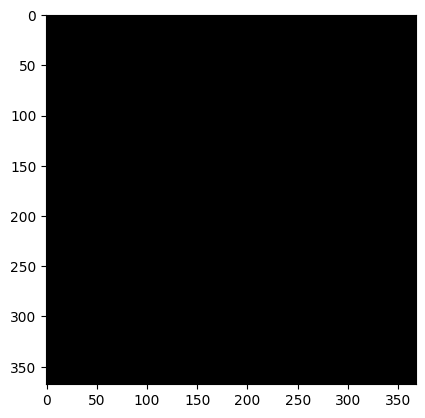

In [49]:
map_size = 92
center = map_size//2
scale = 4
sample_size = 6
game_state = np.zeros((scale*map_size, scale*map_size, 3))
for roll in all_rollouts[:sample_size]:
    pos = np.array([scale*center, scale*center])
    tot_reward = roll['rewards'][-1]
    good = tot_reward/200
    bad = 1 - good
    col = np.array([bad, good, 0])/sample_size
    for act in roll['actions']:
        game_state[pos[0]:pos[0]+scale, pos[1]:pos[1]+scale] += col
        if act in button_to_dir.keys():
            pos += scale*button_to_dir[act]
#game_state = 2/(1 + np.exp(-game_state))-1
#game_state = np.sqrt(game_state)
game_state = np.clip(game_state, 0, 1)
plt.imshow(game_state)

In [226]:
render_videos = False

In [227]:
if render_videos:
    with VideoWriter(fps=60) as v:
        map_size = 128
        center = map_size//2
        scale = 4
        sample_size = 220
        game_state = np.zeros((scale*map_size, scale*map_size, 3))
        for roll in all_rollouts[:sample_size]:
            pos = np.array([scale*center, scale*center])
            tot_reward = roll['rewards'][-1]
            good = tot_reward/200
            bad = 1 - good
            col = np.array([bad, good, 0])
            for idx, act in enumerate(roll['actions']):
                game_state[pos[0]:pos[0]+scale, pos[1]:pos[1]+scale] = 2*col
                if act in button_to_dir.keys():
                    pos += scale*button_to_dir[act]
                if (idx % 256 == 0):
                    v.add(game_state)
                    game_state *= 0.996
        #game_state = 2/(1 + np.exp(-game_state))-1
        #game_state = np.sqrt(game_state)
        #game_state = np.clip(game_state, 0, 1)
        #plt.imshow(game_state)

In [228]:
import mediapy as media

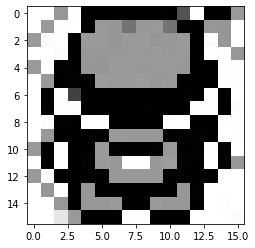

In [229]:
sz = 16
first_frame = media.read_video(next(Path(data_path).glob("*.mp4")))[0]
plt.imshow(first_frame[60:60+sz, 64:64+sz, :])

In [231]:
if render_videos:
    with VideoWriter(fps=60) as v:
        map_size = 64
        center = map_size//2
        scale = 16
        sample_size = 20
        game_state = np.zeros((scale*map_size, scale*map_size, 3))
        fshape = first_frame.shape
        center_s = center*scale
        game_state[center_s:center_s+fshape[0], center_s:center_s+fshape[1]] = first_frame/255
        for roll in all_rollouts[:sample_size]:
            pos = np.array([center_s, center_s])
            tot_reward = roll['rewards'][-1]
            good = tot_reward/200
            bad = 1 - good
            col = np.array([bad, good, 0])
            for idx, act in enumerate(roll['actions']):
                game_state[pos[0]:pos[0]+scale, pos[1]:pos[1]+scale] = 2*col
                if act in button_to_dir.keys():
                    pos += scale*button_to_dir[act]
                if (idx % 256 == 0):
                    v.add(game_state)
                    game_state *= 0.996
        #game_state = 2/(1 + np.exp(-game_state))-1
        #game_state = np.sqrt(game_state)
        #game_state = np.clip(game_state, 0, 1)
        #plt.imshow(game_state)